In [60]:
import pandas as pd
import csv
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [33]:

with open('../data/emotion_data/kerc007voll09_01.csv', 'r') as f:
    reader = csv.reader(f)
    ts = [float(i) for i in list(reader)[0]]

In [257]:
df = pd.read_csv('../data/emotion_data/hock003haar01_01.csv', header=None)

In [258]:
df = df.T

In [259]:
# create dummy dates for the arima modules....
dates = pd.date_range('1800-1-1', periods=len(df), freq='D')
# add the dates and the data to a new dataframe
df['dates'] = dates
# set the dataframe index to be the dates column
df = df.set_index('dates')

Text(0, 0.5, 'Polarity')

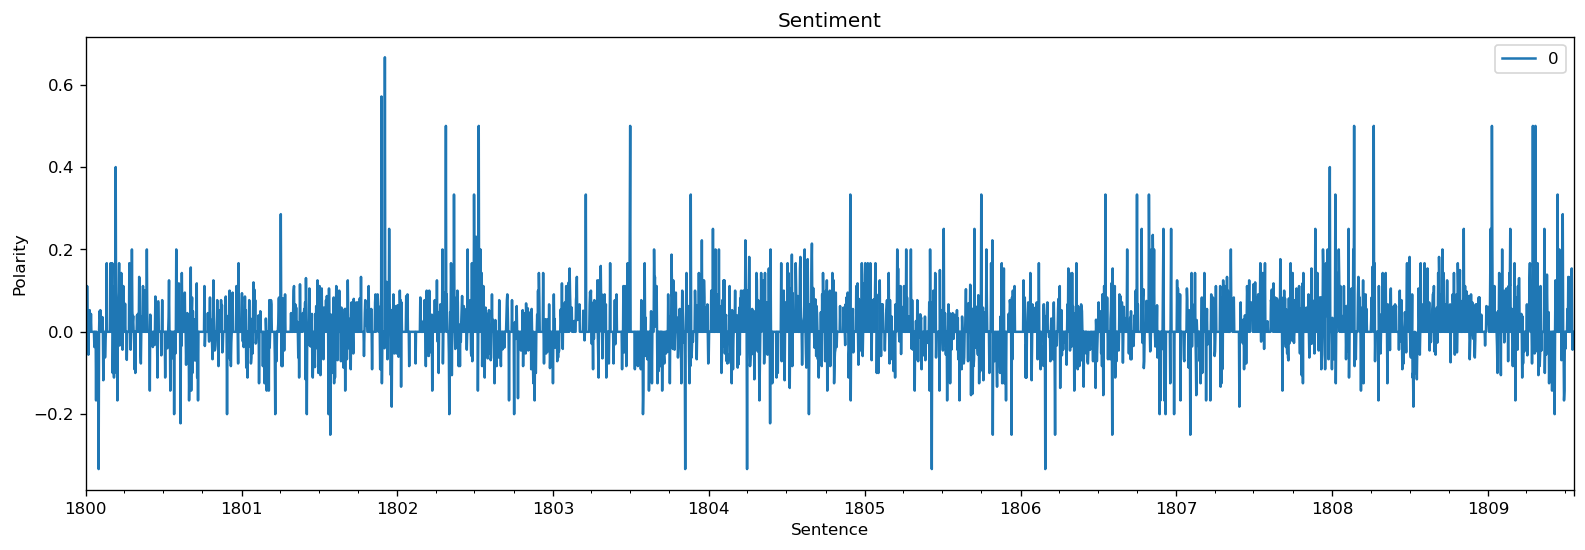

In [260]:
ax = df.plot(figsize=(16,5), title='Sentiment')
ax.set_xlabel("Sentence")
ax.set_ylabel("Polarity")

In [261]:
additive = seasonal_decompose(df[0], model='additive', extrapolate_trend='freq')

Text(0, 0.5, 'Polarity')

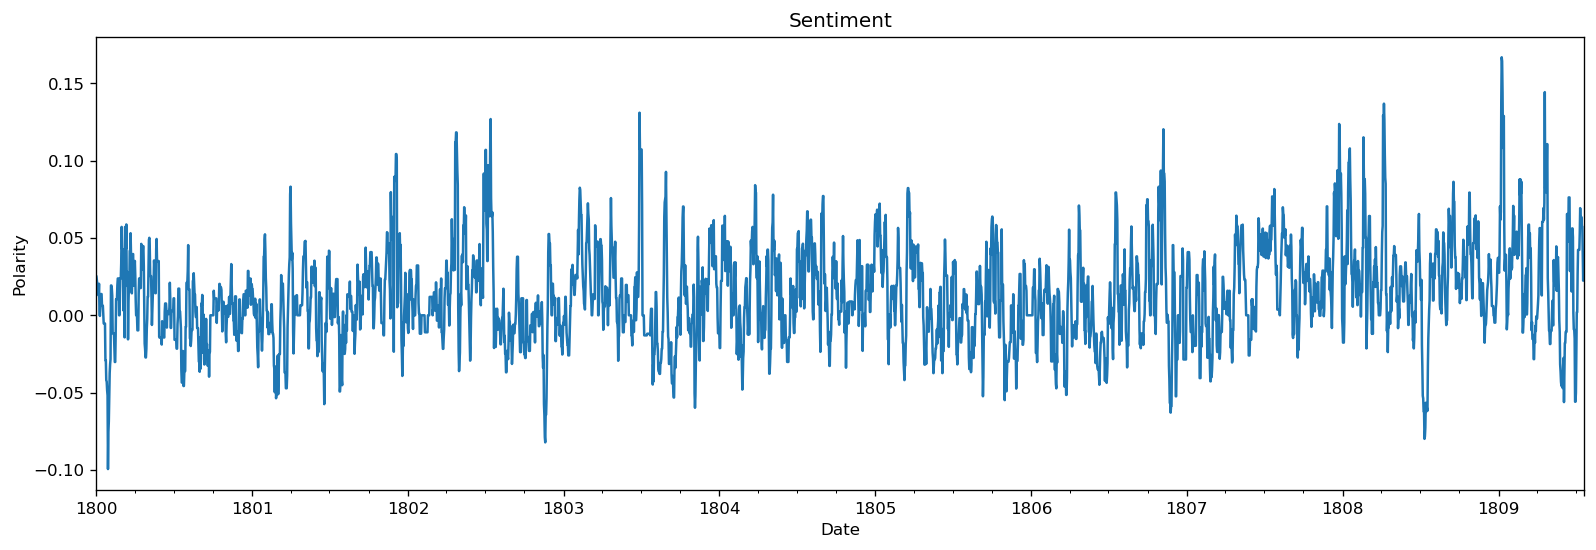

In [262]:
trend = additive.trend

ax = trend.plot(figsize=(16,5), title='Sentiment')
ax.set_xlabel("Date")
ax.set_ylabel("Polarity")



the null hypothesis is that time series is non-stationary. P is below <0.005> thus we reject null and conclude time series is stationary. 

In [263]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)# define input sequence
    
raw_seq = trend.tolist()
# choose a number of time steps
n_steps = 100
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [264]:
X.shape

(3389, 100)

In [270]:
X_train = X[:3200]
y_train = y[:3200]
X_test  = X[3200:]
y_test  = y[3200:]


n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))# define model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X_train, y_train, epochs=25, verbose=1)

In [266]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

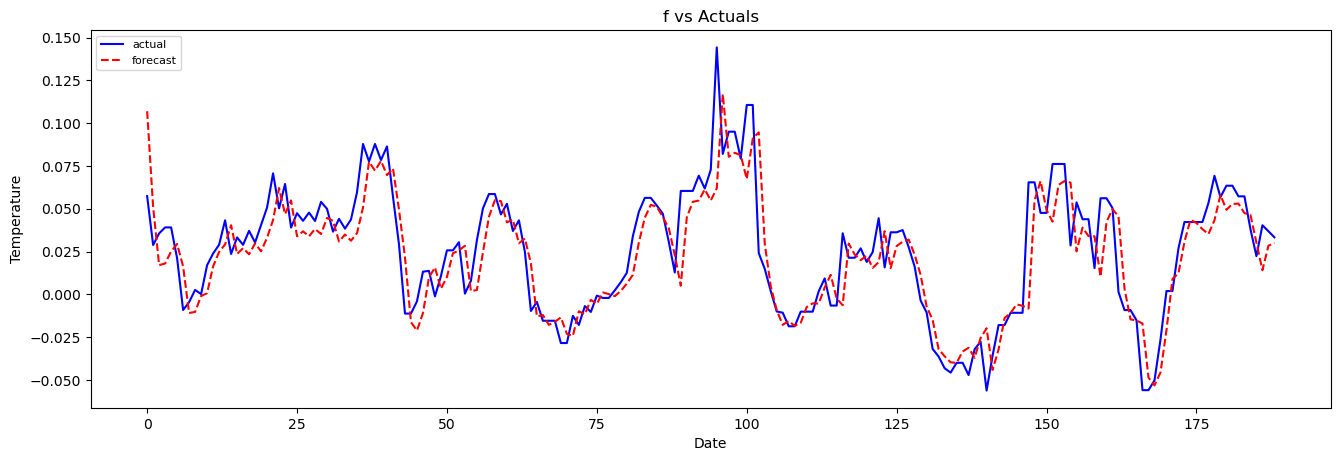

In [267]:
def plot_forecasting(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('f vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)


plot_forecasting(y_test_series, y_pred_series, title='Land x Temperature')

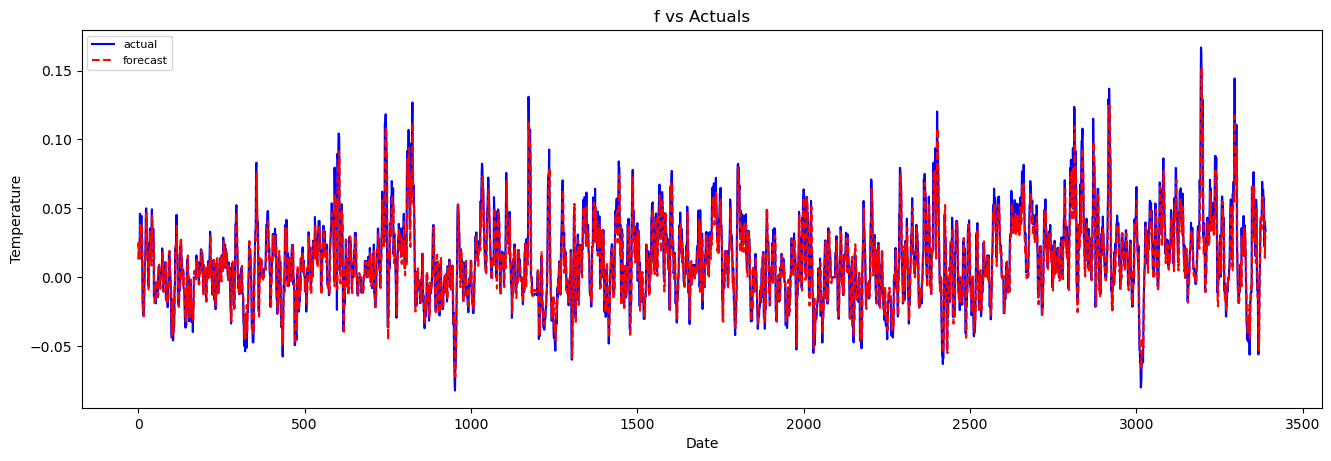

In [268]:
X_all = X.reshape((X.shape[0], X.shape[1], n_features))
y_pred_all = model.predict(X_all, verbose=0)
y_pred_all_1 = y_pred_all.reshape((y_pred_all.shape[0]))
y_pred_all_series = pd.Series(y_pred_all_1)
y_all = y.reshape((y.shape[0]))
y_all_series = pd.Series(y_all)
plot_forecasting(y_all_series, y_pred_all_series, title='Land Average Temperature')